In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# House prices dataset
house_prices = [150000, 180000, 200000, 220000, 240000, 1000000, 150000]

# Calculate measures of center
mean_price = np.mean(house_prices)
median_price = np.median(house_prices)
mode_price = stats.mode(house_prices, keepdims=True)

# Display results
print(f"Mean Price: ${mean_price:,.2f}")
print(f"Median Price: ${median_price:,.2f}")
print(f"Mode Price: ${mode_price.mode[0]:,.2f}, Count: {mode_price.count[0]}")

Mean Price: $305,714.29
Median Price: $200,000.00
Mode Price: $150,000.00, Count: 2


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

test_score = [56,65,67,70,72,75,80,82,85,90,95,100]
mean_score = np.mean(test_score)
median_score = np.median(test_score)
mode_price = stats.mode (test_score, keepdims = True)

#Display result
print (f"mean value : {mean_score,}")
print (f"median_price:{median_score,}")
print (f"mode marks :{mode_price.mode[0],}, count : {mode_price.count[0]}")

mean value : (np.float64(78.08333333333333),)
median_price:(np.float64(77.5),)
mode marks :(np.int64(56),), count : 1


Mean --> 789.0833333333334
Median --> 769.5
Ranges --> 1684
Standard deviation (std) --> 425.1862255399261


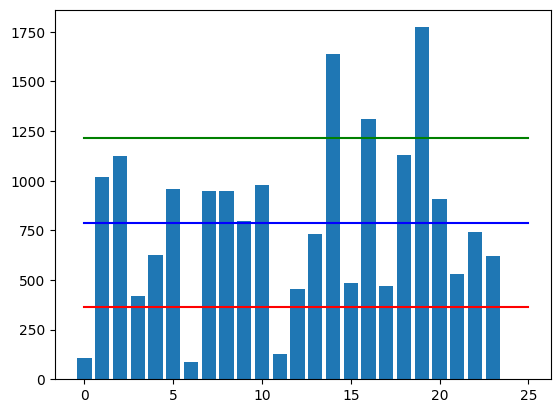

In [8]:
# We take a random sample of 24 of our friends on Facebook and wrote down how many friends that they had on Facebook.

friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981,
           125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 742, 621]

print("Mean -->",np.mean(friends))
print("Median -->",np.median(friends))

ranges = np.max(friends) - np.min(friends)
std = np.std(friends) # == 425.2

print("Ranges -->",ranges)
print("Standard deviation (std) -->",std)

import matplotlib.pyplot as plt
%matplotlib inline
y_pos = range(len(friends))
plt.bar(y_pos, friends)
plt.plot((0, 25), (789, 789), 'b-') # the center
plt.plot((0, 25), (789+425, 789+425), 'g-') # the mean plus the standard deviation
plt.plot((0, 25), (789-425, 789-425), 'r-') # the mean minus the standard deviation

# the data lives between the green and the red lines while the outliers live outside the lines.

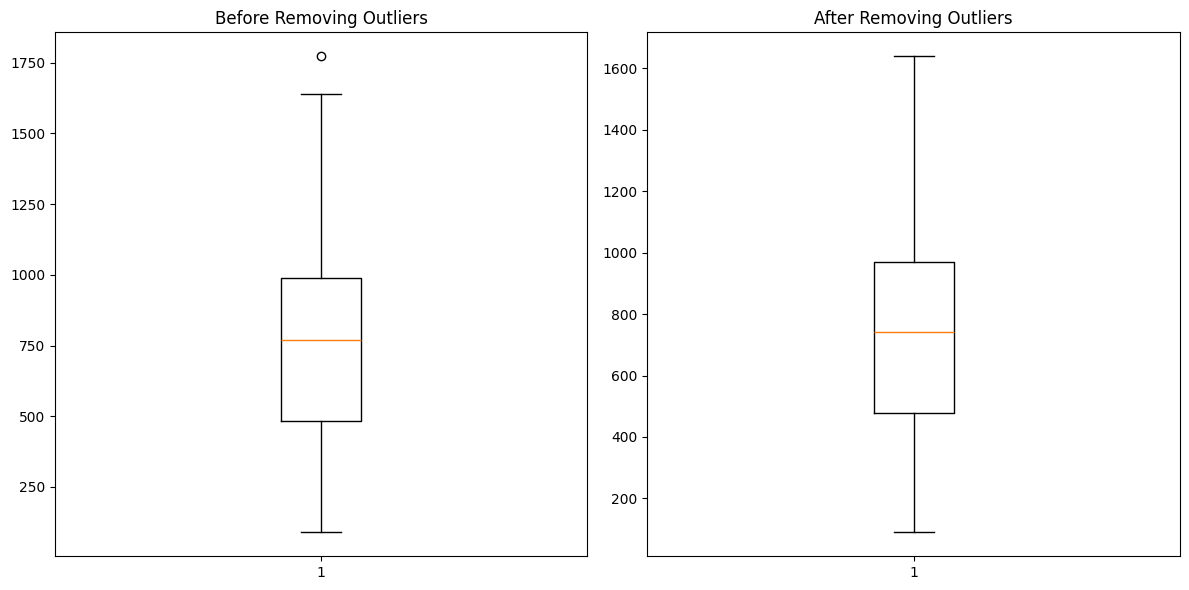

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 
           125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 
           742, 621]

# Step 1: Calculate Q1, Q3, and IQR
Q1 = np.percentile(friends, 25)
Q3 = np.percentile(friends, 75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
filtered_friends = [x for x in friends if lower_bound <= x <= upper_bound]

# Plotting before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Before removing outliers
ax1.boxplot(friends)
ax1.set_title("Before Removing Outliers")

# After removing outliers
ax2.boxplot(filtered_friends)
ax2.set_title("After Removing Outliers")

plt.tight_layout()
plt.show()

<BarContainer object of 24 artists>

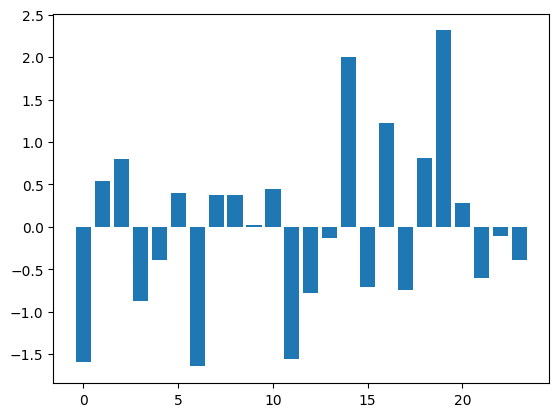

In [10]:
z_scores = []
m = np.mean(friends) # average friends on Facebook
s = np.std(friends) # standard deviation friends on Facebook
for friend in friends:
    z = (friend - m)/s # z-score
    z_scores.append(z) # make a list of the scores for plotting

plt.bar(y_pos, z_scores)

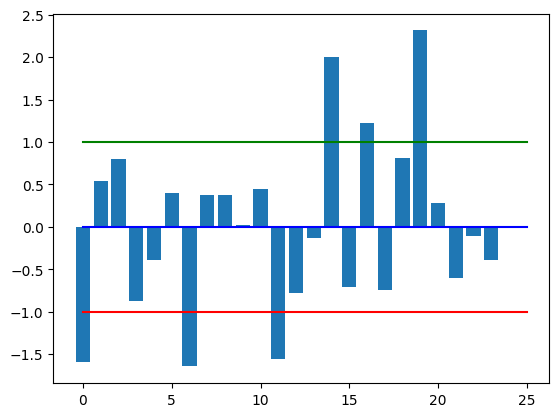

In [11]:
plt.bar(y_pos, z_scores)
plt.plot((0, 25), (1, 1), 'g-') # zero standard deviations away from the mean
plt.plot((0, 25), (0, 0), 'b-') # represents one standard deviation above the mean
plt.plot((0, 25), (-1, -1), 'r-') # one standard deviation below the mean

   friends  happiness
0      109        0.8
1     1017        0.6
2     1127        0.3
3      418        0.6
4      625        0.6


<Axes: xlabel='friends_scaled', ylabel='happiness_scaled'>

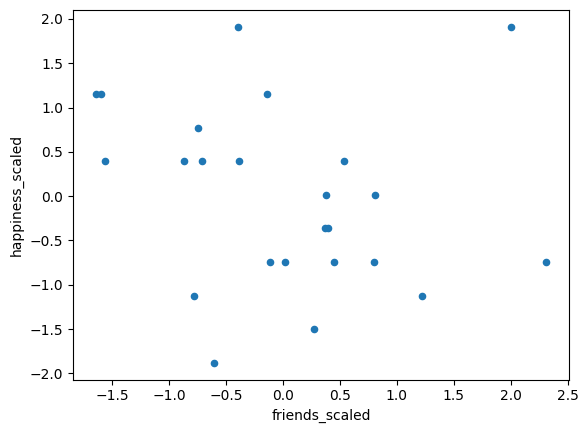

In [18]:
import pandas as pd
from sklearn import preprocessing

happiness = [.8, .6, .3, .6, .6, .4, .8, .5, .4, .3, .3, .6, .2, .8,
1, .6, .2, .7, .5, .3, .1, 0, .3, 1]

df = pd.DataFrame({'friends':friends, 'happiness':happiness})
print(df.head())

## Steps for z score
# Finding the mean of the column
# Finding the standard deviation of the column
# Applying the z-score function to each element in the column
df_scaled = pd.DataFrame(preprocessing.scale(df), columns = ['friends_scaled', 'happiness_scaled'])
df_scaled.head()

df_scaled.plot(kind='scatter', x = 'friends_scaled', y = 'happiness_scaled')

In [19]:
df.corr()

,friends,happiness
friends,1.000000,-0.216199
happiness,-0.216199,1.000000


In [20]:
# finding the percentage of people within one standard deviation ofthe mean
within_1_std = df_scaled[(df_scaled['friends_scaled'] <= 1) & (df_scaled['friends_scaled'] >= -1)].shape[0]
print("within 1 std",within_1_std / float(df_scaled.shape[0]))
# 0.75
# finding the percentage of people within two standard deviations of the mean
within_2_std = df_scaled[(df_scaled['friends_scaled'] <= 2) & (df_scaled['friends_scaled'] >= -2)].shape[0]
print("within 2 std",within_2_std / float(df_scaled.shape[0]))
# 0.916
# finding the percentage of people within three standard deviations of the mean
within_3_std = df_scaled[(df_scaled['friends_scaled'] <= 3) & (df_scaled['friends_scaled'] >= -3)].shape[0]
print("within 3std",within_3_std / float(df_scaled.shape[0]))
# 1.0

within 1 std 0.75
within 2 std 0.9166666666666666
within 3std 1.0


array([[<Axes: title={'center': '0'}>]], dtype=object)

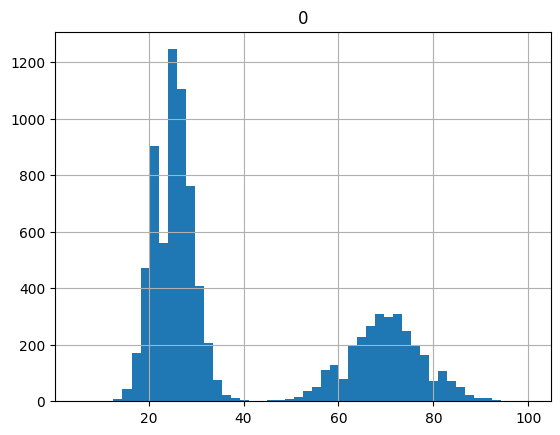

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
np.random.seed(1234)
long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)
breaks = np.concatenate((long_breaks, short_breaks))
pd.DataFrame(breaks).hist(bins=50,range=(5,100))

In [2]:
!pip install scipy

array([[<Axes: title={'center': '0'}>]], dtype=object)

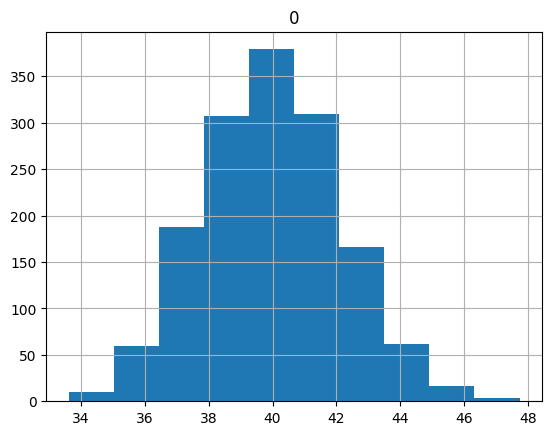

In [9]:
point_estimates = []
for x in range(1500): # Generate 500 samples
    sample = np.random.choice(a= breaks, size=100)
#take a sample of 100 points
    point_estimates.append( sample.mean() )
# add the sample mean to our list of point estimates
pd.DataFrame(point_estimates).hist()
# look at the distribution of our sample

In [13]:
import numpy as np
from scipy import stats
import pandas as pd
np.random.seed(42)
population =np.random.exponential(scale=2, size=10000)




array([[<Axes: title={'center': '0'}>]], dtype=object)

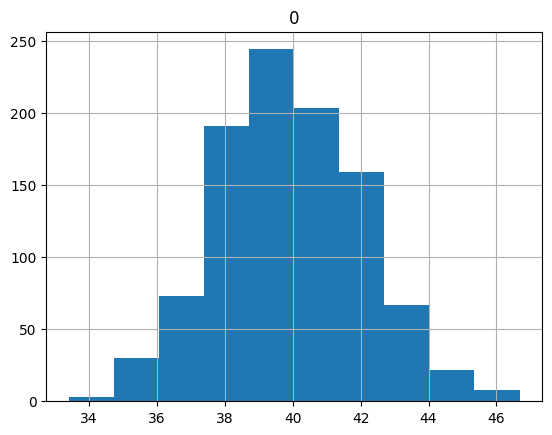

In [12]:
population=[]
for x in range (1000):
    sample= np.random.choice(a=breaks, size =100)
    population.append (sample.mean())
pd.DataFrame(population).hist()


In [15]:
import numpy as np

# Sample
sample_A = np.array([85, 92, 87, 90, 88, 83, 86, 89, 91, 84])
sample_B = np.array([80, 85, 78, 88, 83, 87, 86, 82, 89, 84])

# Perform independent sample t-test
t_statistic, p_value = stats.ttest_ind(sample_A, sample_B)

# Set the significance level (alpha)
alpha = 0.05

# Compute the degrees of freedom (df) (n_A-1)+(n_b-1)
df = len(sample_A)+len(sample_B)-2

# Calculate the critical t-value
# ppf is used to find the critical t-value for a two-tailed test
critical_t = stats.t.ppf(1 - alpha/2, df)


# Print the results
# print("T-value:", t_statistic)
print("P-Value:", p_value)
print("Critical t-value:", critical_t)

# # Decision
# print('With T-value')
# if np.abs(t_statistic) >critical_t:
#     print('There is significant difference between two groups')
# else:
#     print('No significant difference found between two groups')

print('With P-value')
if p_value >alpha:
    print('No evidence to reject the null hypothesis that a significant difference between the two groups')
else:

    print('Evidence found to reject the null hypothesis that a significant difference between the two groups')

P-Value: 0.03741242338800086
Critical t-value: 2.10092204024096
With P-value
Evidence found to reject the null hypothesis that a significant difference between the two groups


In [16]:
from scipy.stats import f_oneway
performance_1 = [89, 89, 88, 78, 79]
performance_2 = [93, 92, 94, 89, 88]
performance_3 = [89, 88, 89, 93, 90]
performance_4 = [81, 78, 81, 92, 82]

stats, f_value = f_oneway(performance_1,performance_2,performance_3,performance_4)
alpha = 0.05

if (f_value < alpha):
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

reject null hypothesis


In [1]:
import pandas as pd
import numpy as np

data = {
    'Age': [25, 30, np.nan, 35, 40, np.nan, 45],
    'Salary': [50000, np.nan, 70000, np.nan, 90000, 120000, 110000],
    'Gender': ['Male', 'Female', np.nan, 'Female', 'Male', 'Male', np.nan],
    'Experience': [1, 3, 5, np.nan, 10, 15, np.nan]
}

df = pd.DataFrame(data)
print("Original DataFrame with Missing Values:")
print(df)

Original DataFrame with Missing Values:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0       NaN  Female         3.0
2   NaN   70000.0     NaN         5.0
3  35.0       NaN  Female         NaN
4  40.0   90000.0    Male        10.0
5   NaN  120000.0    Male        15.0
6  45.0  110000.0     NaN         NaN


In [2]:
print(df.isnull().sum())  

Age           2
Salary        2
Gender        2
Experience    2
dtype: int64


In [3]:
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped_rows)


DataFrame after dropping rows with missing values:
    Age   Salary Gender  Experience
0  25.0  50000.0   Male         1.0
4  40.0  90000.0   Male        10.0


In [4]:
# Impute missing values with the mean
df_mean = df
df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
df_mean['Salary'].fillna(df_mean['Salary'].mean(), inplace=True)
df_mean['Experience'].fillna(df_mean['Experience'].mean(), inplace=True)

print("\nDataFrame after imputing numerical columns with mean:")
print(df_mean)


DataFrame after imputing numerical columns with mean:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0   88000.0  Female         3.0
2  35.0   70000.0     NaN         5.0
3  35.0   88000.0  Female         6.8
4  40.0   90000.0    Male        10.0
5  35.0  120000.0    Male        15.0
6  45.0  110000.0     NaN         6.8


C:\Users\Dell\AppData\Local\Temp\ipykernel_10892\1109794949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10892\1109794949.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [6]:
# Impute missing values with the mean
df_median = df
df_median['Age'].fillna(df_median['Age'].median(), inplace=True)
df_median['Salary'].fillna(df_median['Salary'].median(), inplace=True)
df_median['Experience'].fillna(df_median['Experience'].median(), inplace=True)

print("\nDataFrame after imputing numerical columns with mean:")
print(df_median)


DataFrame after imputing numerical columns with mean:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0   88000.0  Female         3.0
2  35.0   70000.0     NaN         5.0
3  35.0   88000.0  Female         6.8
4  40.0   90000.0    Male        10.0
5  35.0  120000.0    Male        15.0
6  45.0  110000.0     NaN         6.8


C:\Users\Dell\AppData\Local\Temp\ipykernel_10892\2198612604.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median['Age'].fillna(df_median['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10892\2198612604.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [7]:
# Impute missing values with the mode
df_mode = df
df_mode['Gender'].fillna(df_mode['Gender'].mode()[0], inplace=True)


print("\nDataFrame after imputing categorical columns with mode:")
print(df_mode)


DataFrame after imputing categorical columns with mode:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0   88000.0  Female         3.0
2  35.0   70000.0    Male         5.0
3  35.0   88000.0  Female         6.8
4  40.0   90000.0    Male        10.0
5  35.0  120000.0    Male        15.0
6  45.0  110000.0    Male         6.8


C:\Users\Dell\AppData\Local\Temp\ipykernel_10892\1188966738.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode['Gender'].fillna(df_mode['Gender'].mode()[0], inplace=True)


In [8]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Price': [10, 20, 15, 18, 25],
    'Color': ['Red', 'Blue', None, 'Green', 'Red'],
    'Size': [None, 'M', 'L', 'S', 'M']
})


df['Color'] = df['Color'].fillna(df['Color'].mode()[0])  # Most frequent value
df['Size'] = df['Size'].fillna(df['Size'].mode()[0])  # Most frequent value

print(df)

   Price  Color Size
0     10    Red    M
1     20   Blue    M
2     15    Red    L
3     18  Green    S
4     25    Red    M


In [9]:
# Label Encoding  vs ordinal Encoding 

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'Size'
label_encoder = LabelEncoder()
df['Size'] = label_encoder.fit_transform(df['Size'])

print("\nDataFrame after Label Encoding for 'Size':\n", df)


DataFrame after Label Encoding for 'Size':
    Price  Color  Size
0     10    Red     1
1     20   Blue     1
2     15    Red     0
3     18  Green     2
4     25    Red     1


In [11]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), ['Color'])],  # Use column names
    remainder='passthrough'  # Keep numerical columns as they are
)

# Apply the transformation
transformed_data = preprocessor.fit_transform(df)

# Convert back to DataFrame with feature names
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(transformed_data, columns=feature_names)
print(df_encoded)


   onehot__Color_Blue  onehot__Color_Green  onehot__Color_Red  \
0                 0.0                  0.0                1.0   
1                 1.0                  0.0                0.0   
2                 0.0                  0.0                1.0   
3                 0.0                  1.0                0.0   
4                 0.0                  0.0                1.0   

   remainder__Price  remainder__Size  
0              10.0              1.0  
1              20.0              1.0  
2              15.0              0.0  
3              18.0              2.0  
4              25.0              1.0  


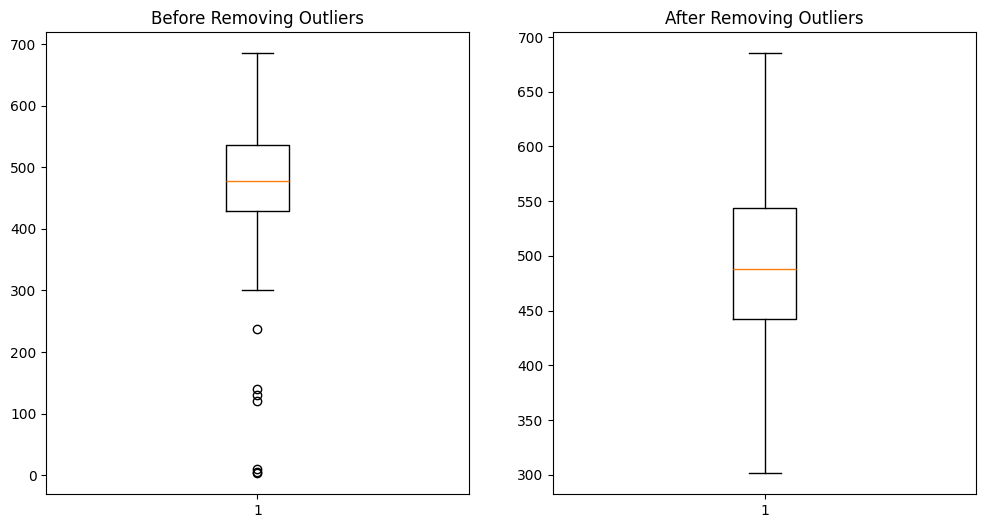

Data after removing outliers:
        Value
0  549.671415
1  486.173570
2  564.768854
3  652.302986
4  476.584663


In [13]:
# Generate some random data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
data = np.random.normal(loc=500, scale=100, size=100)  # Normal distribution

# Add extreme outliers (including very low values)
outliers = np.array([10, 120, 130, 5, 140, 3])
data_with_outliers = np.concatenate([data, outliers])

# Convert to DataFrame
df = pd.DataFrame({'Value': data_with_outliers})

# Calculate Q1, Q3, and IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Value'])
ax1.set_title("Before Removing Outliers")

ax2.boxplot(df_filtered['Value'])
ax2.set_title("After Removing Outliers")

plt.show()

print("Data after removing outliers:")
print(df_filtered.head())

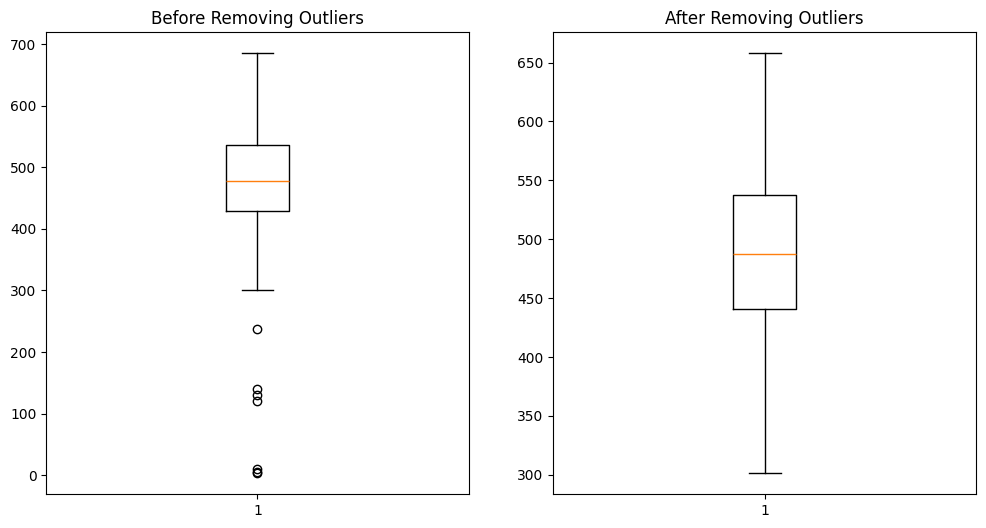

Data after removing outliers (Z-score method):
        Value
0  549.671415
1  486.173570
2  564.768854
3  652.302986
4  476.584663


In [16]:
from sklearn.preprocessing import StandardScaler

# Reshape data for scaling
data_reshaped = df[['Value']].values  

# Use StandardScaler to compute Z-scores
scaler = StandardScaler()
z_scores = scaler.fit_transform(data_reshaped)

# Define a threshold (commonly 3)
threshold = 1.5
df_filtered_z = df[np.abs(z_scores) < threshold]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Value'])
ax1.set_title("Before Removing Outliers")

ax2.boxplot(df_filtered_z['Value'])
ax2.set_title("After Removing Outliers")

plt.show()

print("Data after removing outliers (Z-score method):")
print(df_filtered_z.head())

In [1]:
import pandas as pd

def load_housing_data(HOUSING_PATH):
 return pd.read_csv(HOUSING_PATH)

housing = load_housing_data("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing_new = housing.drop(columns=['ocean_proximity'])
# creating own features and  check whether its correlation
housing_new["rooms_per_household"] = housing_new["total_rooms"]/housing_new["households"]
housing_new["bedrooms_per_room"] = housing_new["total_bedrooms"]/housing_new["total_rooms"]
housing_new["population_per_household"]=housing_new["population"]/housing_new["households"]


# checking over the correlation of median house price with other features
corr_matrix = housing_new.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [6]:


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
X = housing.drop('median_house_value', axis=1)  # Features (exclude target)
y = housing['median_house_value']  # Target
housing_num = X.select_dtypes(include=['float64', 'int64']).columns
housing_cat = X.select_dtypes(include=['object']).columns


## Define the numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Scale the numerical features
])

# Define the categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, housing_num),  # Apply num_pipeline to numerical columns
    ('cat', cat_pipeline, housing_cat)   # Apply cat_pipeline to categorical columns
])

PRINCIPAL COMPONENT ANALYSIS

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("housing.csv")  # Replace with actual dataset path
df.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


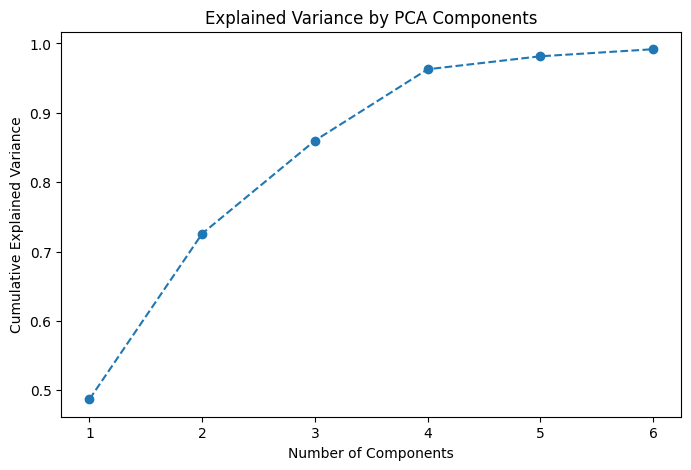

In [12]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['median_house_value'], errors='ignore')  # Drop target if applicable

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also use "median" or "most_frequent"
scaled_data = imputer.fit_transform(scaled_data)
# manually 
from sklearn.decomposition import PCA

# Choose the number of components
pca = PCA(n_components=6)  # Adjust based on variance explained
pca_features = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(6)])


import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

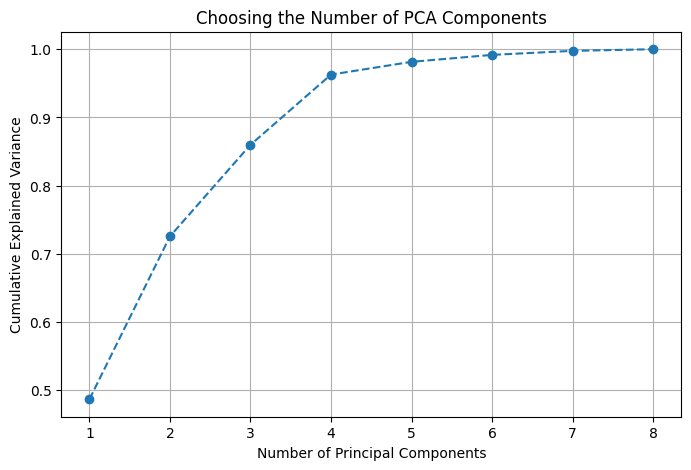

In [13]:
# automate the n component

from sklearn.decomposition import PCA
import numpy as np

# Apply PCA without specifying components (to analyze all)
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative variance explained
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.grid()
plt.show()

Optimal number of components: 4


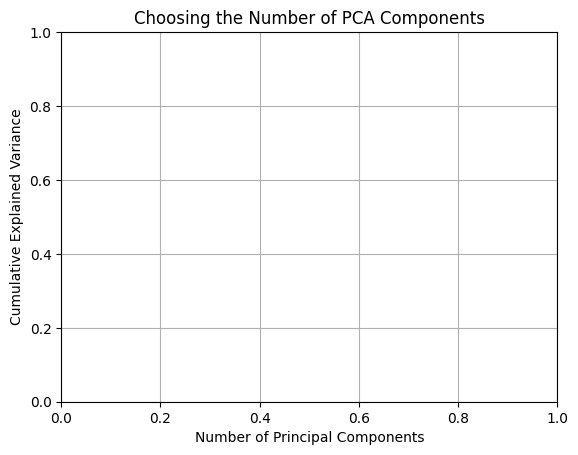

In [ ]:
# Find the number of components that explain at least 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


pca = PCA(n_components=optimal_components)
pca
